<h1 style = "color:red" align = "center" > BÀI TẬP LỚN XÁC SUẤT THỐNG KÊ  </h1>

<h2 style = "color:blue" align = "center" > L01-NHÓM 13  </h2>

## **Danh sách thành viên**

- **Lâm Thành Phát** - 2111974

- **Hoàng Tuấn Tài** - 2114680

- **Hoàng Bảo Ngọc** - 2114198

In [1]:
# Cài đặt thư viện khi chạy lần đầu
! pip install numpy 
! pip install matplotlib
! pip install scipy
! pip install pandas

<h2 style = "color:green" align = "left" > BÀI 1 </h2>

In [2]:
#Import thư viện 
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Đọc file dữ liệu từ máy tính
# Khi chạy trên máy khác cần chỉnh sửa lại đường dẫn tới file Bai1.xlsx
data = pd.read_excel("D:\XSTK\Bai1.xlsx")
data

,N,Utd
0,1,2.612
1,2,2.855
2,3,2.078
3,4,2.650
4,5,2.666
5,6,2.556
6,7,2.246
7,8,2.818
8,9,2.845
9,10,2.743


In [4]:
# Lấy số lần đo làm index cho dữ liệu
data_cop = data.set_index(data["N"])
data_cop.drop(["N"],axis = 1,inplace = True)
data_cop

,Utd
N,
1,2.612
2,2.855
3,2.078
4,2.650
5,2.666
6,2.556
7,2.246
8,2.818
9,2.845


In [5]:
# Kiểm tra dữ liệu bị thiếu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       15 non-null     int64  
 1   Utd     15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


In [6]:
# Mô tả sơ lược về mẫu dữ liệu
data.describe()

,N,Utd
count,15.000000,15.000000
mean,8.000000,2.672000
std,4.472136,0.243479
min,1.000000,2.078000
25%,4.500000,2.631000
50%,8.000000,2.729000
75%,11.500000,2.797500
max,15.000000,3.081000


In [7]:
from scipy.stats import t
# Lấy dữ liệu của cột U_td để tính toán
U_val = data["Utd"].values
print("Giá trị của các hiệu điện thế đo được:\n", U_val)

Giá trị của các hiệu điện thế đo được:
 [2.612 2.855 2.078 2.65  2.666 2.556 2.246 2.818 2.845 2.743 2.67  3.081
 2.729 2.777 2.754]


In [8]:
# Hàm xác định khoảng tin cậy, kết quả trả về giá trị trung bình (mean) và độ chính xác (h)
def m_confidence_interval(data,alpha):
    """
    data: input data to function
    alpha: confidence coefficient 
    """
    len_n = len(data)
    mean, std_err = np.mean(data), st.sem(data) 
    h = std_err* t.ppf((1+alpha)/2.,len_n-1)
    return mean, h

## Giải thích

**np.mean(data):** Tính giá trị trung bình của data

**st.sem(data):** Tính sai số chuẩn của data, tức là tính $\frac{\sigma}{\sqrt{n}}$.

**t.ppf():** Tính giá trị của $T_{\alpha}$ từ bảng phân phối của phân phối Student, ở đây ta có $T_{\frac{\alpha}{2}}(n-1)$

In [9]:
# Gọi hàm
alpha = 0.97
mean_Utd, e = m_confidence_interval(U_val, alpha)

In [10]:
print("Điện áp phóng điện trung bình trong 15 lần đo: {} (V)".format(mean_Utd))

Điện áp phóng điện trung bình trong 15 lần đo: 2.6719999999999997 (V)


In [11]:
print("Độ chính xác của phép đo: e = {}".format(e))

Độ chính xác của phép đo: e = 0.1518147656587077


In [12]:
print("Khoảng phóng điện chọc thủng của mẫu điện môi với độ tin cậy {} % là: ({}, {}) (V)"
      .format(alpha*100,mean_Utd-e,mean_Utd+e))

Khoảng phóng điện chọc thủng của mẫu điện môi với độ tin cậy 97.0 % là: (2.520185234341292, 2.8238147656587076) (V)


<h2 style = "color:green" align = "left" > BÀI 2 </h2>

### Một số lý thuyết 

- **FOR (Viết tắt cho Forced Outage Rate):** là xác suất ngừng hoạt động của một 
máy phát và thường được tính bằng tỉ lệ giữa số thời gian ngừng hoạt động 𝑟 và tổng 
thời gian 𝑚 + 𝑟 ( với 𝑚 là thời gian hoạt động ). Chính vì vậy, đại lượng này không
có thứ nguyên: $\text{FOR} = u = \frac{r}{m+r}$


- **Hệ số sẵn sàng $a = 1 - u$**.


- **LOLP (Loss of Load Probability)**:  là xác suất một hệ thống không 
đủ khả năng để cung cấp điện cho tải. 


- **LOLE (Viết tắt cho Lost of Load Expectation)**  chỉ số dự báo mất tải, là kỳ 
vọng của thời gian trong năm mà hệ thống điện không đủ khả năng cấp điện cho tải. 
Đơn vị thường dùng là: Giờ/năm, và có thể được tính nhanh bằng cách nhân LOLP
với 8760 (1 năm ≈ 8760 𝑔𝑖ờ).

$$\text{LOLE} = \sum \limits^{n}_{k=1}p_k t_k$$


  Với $n, p_k, t_k$ lần lượt là tổng số lượng mất tải, xác suất mất tải của trường hợp k và đơn vị thời gian mất tải k.  

- **LOEE (Loss of Energy Expectation):** Lượng điện năng kỳ vọng bị thiếu hụt trong năm.

$$\text{LOLE} = \sum \limits^{n}_{k=1}p_k E_k$$
        
        
  Với $n, p_k, E_k$ lần lượt là tổng số lượng mất tải, xác suất mất tải của trường hợp k và lượng điện năng thiếu hụt trong trường hợp mất tải k. 
    
-  **Tải đỉnh (Peak Load):** là công suất tiêu thụ tối đa của các thiết bị điện được 
dự báo vào đầu năm



- **Đường cong đặc tính của tải**: là đường cong biểu thị sự thay đổi của nhu cầu 
điện và khả năng cấp điện của một nhà máy điện trong một thời gian hay cho biết 
thời gian phụ tải có giá trị lớn hơn công suất nguồn tại một thời điểm trong 
năm**

Thông số đề bài: 
- Số lượng tổ máy: 12
- Công suất mỗi tổ máy: 6 (MW)
- FOR: 0.04
- Phụ tải đỉnh: 60 (MW)
- Độ lệch chuẩn: $\sigma = 3 \%$
- Đường cong đặc tính tải: Linear ($100 \% \to  50 \%$)

In [13]:
# Chương trình in ra các thông số cần thiết của đề bài
def infor(nums_of_machine, power_per_machine, For, peak_load, std, load_char):
    """
    nums_of_machine: Số lượng máy điện
    power_per_machine: Công suất mỗi máy
    For: Chỉ số FOR
    peak_load: Giá trị phụ tải đỉnh dự đoán
    std: Độ lệch chuẩn phụ tải đỉnh
    load_char: Điểm cuối của đường đặc tính tải
    """
    
    fac_power = nums_of_machine * power_per_machine
    
    print("----------THÔNG SỐ TÍNH TOÁN-------------")
    print("Số lượng máy điện: ", nums_of_machine)
    print("Công suất mỗi máy: {} (MW)".format(power_per_machine))
    print("Tổng công suất của nhà máy: {} (MW)".format(fac_power))
    print("Hệ số sẵn sàng: ", 1- For)
    print("Phụ tải đỉnh: ", peak_load)

In [14]:
# Truyền số liệu đề bài vào hàm
infor(12,6,0.04, 60, 0.03, 0.5)

----------THÔNG SỐ TÍNH TOÁN-------------
Số lượng máy điện:  12
Công suất mỗi máy: 6 (MW)
Tổng công suất của nhà máy: 72 (MW)
Hệ số sẵn sàng:  0.96
Phụ tải đỉnh:  60


### Tính toán tổng quát

**Kiểm tra giá trị của phụ tải trên thực tế:** $P_{load} = P_{\text{loadpred}} \pm \theta.\sigma.std $, 
$\theta \in \{0. \pm 1, \pm 2, \pm 3\}$  (Xấp xỉ phối chuẩn theo quy tắc 3 $\sigma$)

**Công suất tiêu thụ nhỏ nhất: $P_{load}$ min = load_char $\times$ $P_{load}$**

Gọi 
- $p_i$ là xác suất có $i$ có i máy hoạt động. 

- $T_{i}$ là khoảng thời gian công suất bị thiếu khi có $i$ máy hoạt động.

- $P_{i}$ là công suất còn lại của nhà máy khi có $i$ máy hoạt động.

- $\gamma$ là hệ số góc đường thẳng tính tải: 

$$\gamma = \frac{P_{Lmax}-P_{Lmin}}{8760}=\frac{P_{Lmax}-P_i}{T_i}$$

Một số công thức rút ra:

- $p_i = C^{\text{no_machine}}_{i} a^i.u^{\text{no_machine}-i}$ (Phân phối nhị thức).


- $T_i = \begin{cases}
0, &\text{if  } P_i > P_{Lmax} \\
\frac{P_{Lmax}-P_i}{\gamma}, &\text{if  } P_{Lmin} \le P_i \le  P_{Lmax} \\
8760 &\text{if  } P_i < P_{Lmin} \\
\end{cases}$


- $\text{LOLE} = T = \sum \limits^{\text{no_machine}}_{i=0} T_i.p_i$


- $\text{LOEE}= A = \sum \limits^{\text{no_machine}}_{i=0}(A_i × p_i)$ 

Với 
$\begin{cases}
A_i = 0,  &\text{if  } T_i = 0 \\
A_i = \frac{1}{2}\left(P_{Lmax} - P_i\right).T_i, &\text{if  } T_i = \frac{P_{Lmax}-P_i}{\gamma}\\
A_i = \frac{1}{2}\left(P_{Lmax} - P_{Lmin}-2P_i\right).8760, &\text{if  } T_i = 8760\\
\end{cases}$


In [15]:
#Import thư viện tính toán
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [16]:
# Khai báo số liệu đề bài vào biến
nums_of_machines = 12
power_per_machine = 6
peak_load = 60
For = 0.04
std = 0.03
load_char = 0.5

In [17]:
# Chương trình tính các thông số LOLE, LOEE theo từng trường hợp của theta

def calculate(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char):
    """
    INPUT:
    nums_of_machine: Số lượng máy điện
    power_per_machine: Công suất mỗi máy
    For: Chỉ số FOR
    peak_load: Giá trị phụ tải đỉnh dự đoán
    std: Độ lệch chuẩn phụ tải đỉnh
    load_char: Điểm cuối của đường đặc tính tải
    
    OUTPUT: 
    pi: Danh sách các xác suất các trường hợp có i máy bảo trì (pi)
    P: Danh sách các công suất cung cấp còn lại trong trường hợp i máy bảo trì (Pi)
    T: Danh sách thời gian thiếu nguồn trong năm theo các trường hợp của i (Ti)
    T_exp: Danh sách thời gian thiếu nguồn kỳ vọng trong năm theo các trường hợp của i (Ti)
    A: Danh sách điện năng bị thiếu theo các trường hợp của i (Ai)
    A_exp: Danh sách điện năng bị thiếu kỳ vọng theo các trường hợp của i (Ai)
    LOLE: Tổng của T_exp
    LOEE: Tổng của A_exp
    T_exp[i] = T * pi[i]
    A_exp[i]= A * pi[i]
    """
    
    # Tính phụ tải đỉnh max và min, gamma
    P_lmax = peak_load + theta * std * peak_load
    P_lmin = load_char * P_lmax
    gamma = (P_lmax-P_lmin)/(8760)
    # Khởi tạo output
    pi= [0 for i in range(0, nums_of_machines+1)]
    P = [0 for i in range(0, nums_of_machines+1)]
    T = [0 for i in range(0, nums_of_machines+1)]
    T_exp = [0 for i in range(0, nums_of_machines+1)]
    A =[0 for i in range(0, nums_of_machines+1)]
    A_exp  = [0 for i in range(0, nums_of_machines+1)]
    for i in range(0, nums_of_machines+1):
        pi[i] = math.comb(nums_of_machines, i)* pow(1-For,i) * pow(For, nums_of_machines-i)
        P[i] = nums_of_machines * power_per_machine - (nums_of_machines-i) * power_per_machine
        if (P[i] > P_lmax):
            T[i] = 0
            A[i] = 0
        elif (P_lmin <= P[i] <= P_lmax):
            T[i] = (P_lmax - P[i])/gamma
            A[i] = 1/2*(P_lmax - P[i])*T[i]
        else:
            T[i] = 8760
            A[i] = 1/2*(P_lmax + P_lmin - 2*P[i])*8760
        T_exp[i] = pi[i] * T[i]
        A_exp[i] = pi[i]* A[i]
    LOLE = sum(T_exp)
    LOEE = sum(A_exp)
    return pi, P, T, T_exp, A, A_exp, LOLE, LOEE, P_lmax, P_lmin

In [18]:
# Chương trình tính toán và xuất kết quả dạng bảng theo từng trường hợp của theta, theta = 0, +- 1, +-2, +-3
def show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char):
    pi, P, T, T_exp, A, A_exp, LOLE, LOEE, P_lmax, P_lmin = calculate(nums_of_machines, 
                                                                      power_per_machine, peak_load, For, std, theta, load_char)
    # Create dataframe 
    d = {"Số máy còn hoạt động": range(0,len(pi)),"CS còn lại": P, "Xác suất i máy hoạt động": pi, 
         "Thời gian thiếu nguồn trong năm": T, 
    "Thời gian thiếu nguồn kỳ vọng trong năm": T_exp, "Điện năng bị thiếu trong năm": A, 
     "Điện năng bị thiếu kỳ vọng trong năm": 
     A_exp
    }
    styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ('font-weight', 'bold'),
                              ("color", 'black')])]
    df = pd.DataFrame(data=d)
    df = df.style.set_caption('Bảng số liệu tính toán khi theta = {} sigma'.format(theta)).set_table_styles(styles)
    print("--------------- TRƯỜNG HỢP THETA = {} SIGMA -----------------\n".format(theta))
    print("P_lmax = {} (MW), P_lmin = {} (MW)\n".format(P_lmax, P_lmin))
    print(" Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = {} sigma: LOLE = {} (giờ/năm)".format(theta, LOLE))
    print(" Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = {} sigma: LOEE = {} (MW/năm)".format(theta,LOEE))
    df
    return df, LOLE, LOEE

In [19]:
# Trường hợp 1: Theta = +3sigma
theta = 3
dfpos3, lole3, loee3 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfpos3

--------------- TRƯỜNG HỢP THETA = 3 SIGMA -----------------

P_lmax = 65.4 (MW), P_lmin = 32.7 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 3 sigma: LOLE = 136.00690681633333 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 3 sigma: LOEE = 485.8550794424122 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,429678.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,377118.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,324558.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,271998.000000,0.000014
4,4,24,0.000000,8760.000000,0.000024,219438.000000,0.000605
5,5,30,0.000000,8760.000000,0.000927,166878.000000,0.017656
6,6,36,0.000003,7875.963303,0.023333,115776.660550,0.342989
7,7,42,0.000061,6268.623853,0.382029,73342.899083,4.469736
8,8,48,0.000914,4661.284404,4.261089,40553.174312,37.071476
9,9,54,0.009751,3053.944954,29.778647,17407.486239,169.738286


In [20]:
# Trường hợp 2: Theta = +2sigma
theta = 2
dfpos2, lole2, loee2 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfpos2

--------------- TRƯỜNG HỢP THETA = 2 SIGMA -----------------

P_lmax = 63.6 (MW), P_lmin = 31.8 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 2 sigma: LOLE = 99.7244619353817 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 2 sigma: LOEE = 283.9830713103505 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,417852.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,365292.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,312732.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,260172.000000,0.000013
4,4,24,0.000000,8760.000000,0.000024,207612.000000,0.000572
5,5,30,0.000000,8760.000000,0.000927,155052.000000,0.016405
6,6,36,0.000003,7603.018868,0.022524,104921.660377,0.310831
7,7,42,0.000061,5950.188679,0.362622,64262.037736,3.916321
8,8,48,0.000914,4297.358491,3.928408,33519.396226,30.641584
9,9,54,0.009751,2644.528302,25.786475,12693.735849,123.775078


In [21]:
# Trường hợp 3: Theta = +1sigma
theta = 1
dfpos1, lole1, loee1 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfpos1

--------------- TRƯỜNG HỢP THETA = 1 SIGMA -----------------

P_lmax = 61.8 (MW), P_lmin = 30.9 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 1 sigma: LOLE = 61.32847657592804 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 1 sigma: LOEE = 144.6926000730808 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,406026.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,353466.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,300906.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,248346.000000,0.000013
4,4,24,0.000000,8760.000000,0.000024,195786.000000,0.000539
5,5,30,0.000000,8760.000000,0.000927,143226.000000,0.015154
6,6,36,0.000003,7314.174757,0.021668,94352.854369,0.279521
7,7,42,0.000061,5613.203883,0.342085,55570.718447,3.386646
8,8,48,0.000914,3912.233010,3.576348,26994.407767,24.676800
9,9,54,0.009751,2211.262136,21.561749,8623.922330,84.090820


In [22]:
# Trường hợp 4: Theta = +0sigma
theta = 0
dfpos0, lole0, loee0 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfpos0

--------------- TRƯỜNG HỢP THETA = 0 SIGMA -----------------

P_lmax = 60.0 (MW), P_lmin = 30.0 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 0 sigma: LOLE = 20.628732094907313 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 0 sigma: LOEE = 73.61600405113433 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,394200.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,341640.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,289080.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,236520.000000,0.000012
4,4,24,0.000000,8760.000000,0.000024,183960.000000,0.000507
5,5,30,0.000000,8760.000000,0.000927,131400.000000,0.013903
6,6,36,0.000003,7008.000000,0.020761,84096.000000,0.249135
7,7,42,0.000061,5256.000000,0.320316,47304.000000,2.882847
8,8,48,0.000914,3504.000000,3.203164,21024.000000,19.218982
9,9,54,0.009751,1752.000000,17.083539,5256.000000,51.250618


In [23]:
# Trường hợp 5: Theta = -1sigma
theta = -1
dfneg1, loleneg1, loeeneg1 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfneg1

--------------- TRƯỜNG HỢP THETA = -1 SIGMA -----------------

P_lmax = 58.2 (MW), P_lmin = 29.1 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -1 sigma: LOLE = 15.453144996447417 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -1 sigma: LOEE = 42.84489217241815 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,382374.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,329814.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,277254.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,224694.000000,0.000011
4,4,24,0.000000,8760.000000,0.000024,172134.000000,0.000474
5,5,30,0.000000,8489.072165,0.000898,119695.917526,0.012664
6,6,36,0.000003,6682.886598,0.019798,74180.041237,0.219759
7,7,42,0.000061,4876.701031,0.297201,39501.278351,2.407326
8,8,48,0.000914,3070.515464,2.806896,15659.628866,14.315169
9,9,54,0.009751,1264.329897,12.328327,2655.092784,25.889488


In [24]:
# Trường hợp 6: Theta = -2sigma
theta = -2
dfneg2, loleneg2, loeeneg2 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfneg2

--------------- TRƯỜNG HỢP THETA = -2 SIGMA -----------------

P_lmax = 56.4 (MW), P_lmin = 28.2 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -2 sigma: LOLE = 9.947201274681545 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -2 sigma: LOEE = 20.908100036487603 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,370548.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,317988.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,265428.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,212868.000000,0.000011
4,4,24,0.000000,8760.000000,0.000024,160308.000000,0.000442
5,5,30,0.000000,8200.851064,0.000868,108251.234043,0.011453
6,6,36,0.000003,6337.021277,0.018773,64637.617021,0.191489
7,7,42,0.000061,4473.191489,0.272610,32206.978723,1.962790
8,8,48,0.000914,2609.361702,2.385335,10959.319149,10.018405
9,9,54,0.009751,745.531915,7.269591,894.638298,8.723509


In [25]:
# Trường hợp 7: Theta = -2sigma
theta = -3
dfneg3, loleneg3, loeeneg3 = show_result(nums_of_machines, power_per_machine, peak_load, For, std, theta, load_char)
dfneg3

--------------- TRƯỜNG HỢP THETA = -3 SIGMA -----------------

P_lmax = 54.6 (MW), P_lmin = 27.3 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -3 sigma: LOLE = 4.078228296535531 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = -3 sigma: LOEE = 8.679351573948034 (MW/năm)


,Số máy còn hoạt động,CS còn lại,Xác suất i máy hoạt động,Thời gian thiếu nguồn trong năm,Thời gian thiếu nguồn kỳ vọng trong năm,Điện năng bị thiếu trong năm,Điện năng bị thiếu kỳ vọng trong năm
0,0,0,0.000000,8760.000000,0.000000,358722.000000,0.000000
1,1,6,0.000000,8760.000000,0.000000,306162.000000,0.000000
2,2,12,0.000000,8760.000000,0.000000,253602.000000,0.000000
3,3,18,0.000000,8760.000000,0.000000,201042.000000,0.000010
4,4,24,0.000000,8760.000000,0.000024,148482.000000,0.000409
5,5,30,0.000000,7893.626374,0.000835,97091.604396,0.010273
6,6,36,0.000003,5968.351648,0.017681,55505.670330,0.164436
7,7,42,0.000061,4043.076923,0.246397,25471.384615,1.552302
8,8,48,0.000914,2117.802198,1.935978,6988.747253,6.388727
9,9,54,0.009751,192.527473,1.877312,57.758242,0.563194


In [26]:
# Lập bảng LOLE, LOEE theo các trường hợp của theta
def lole_loee():
    lole = []
    loee = []
    theta = [3, 2, 1, 0, -1, -2, -3]
    for i in theta:
        df, lole_, loee_ = show_result(nums_of_machines, power_per_machine, peak_load, For, std, i, load_char)
        lole.append(lole_)
        loee.append(loee_)
    d = {"LOLE": lole, "LOEE": loee}
    df = pd.DataFrame(data=d,index = ["theta = 3", "theta = 2","theta = 1", 
                                              "theta = 0", "theta = -1", "theta = -2", "theta = -3"])
    return df

In [27]:
df = lole_loee()
df

--------------- TRƯỜNG HỢP THETA = 3 SIGMA -----------------

P_lmax = 65.4 (MW), P_lmin = 32.7 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 3 sigma: LOLE = 136.00690681633333 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 3 sigma: LOEE = 485.8550794424122 (MW/năm)
--------------- TRƯỜNG HỢP THETA = 2 SIGMA -----------------

P_lmax = 63.6 (MW), P_lmin = 31.8 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 2 sigma: LOLE = 99.7244619353817 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 2 sigma: LOEE = 283.9830713103505 (MW/năm)
--------------- TRƯỜNG HỢP THETA = 1 SIGMA -----------------

P_lmax = 61.8 (MW), P_lmin = 30.9 (MW)

 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 1 sigma: LOLE = 61.32847657592804 (giờ/năm)
 Thời gian kỳ vọng thiếu hụt công suất nguồn khi theta = 1 sigma: LOEE = 144.6926000730808 (MW/năm)
--------------- TRƯỜNG HỢP THETA = 0 SIGMA -----------------

P_lmax = 60.0 (MW), P_lmin = 

,LOLE,LOEE
theta = 3,136.006907,485.855079
theta = 2,99.724462,283.983071
theta = 1,61.328477,144.692600
theta = 0,20.628732,73.616004
theta = -1,15.453145,42.844892
theta = -2,9.947201,20.908100
theta = -3,4.078228,8.679352


In [43]:
# Chương trình vẽ đường đặc tính tải theo phụ tải thực tế
plt.style.use("dark_background")
def visualize():
    fig = plt.figure(figsize = (10,10))
    plt.title("Đường cong phụ tải", fontsize = 20)
    T_show = [0, 8760]
    color_list = ["blue", "orange", "green", "red", "yellow", "brown", "pink"]
    theta = [3, 2, 1, 0, -1, -2, -3]
    for i, c in zip(theta, color_list):
        pi, P, T, T_exp, A, A_exp, LOLE, LOEE, P_lmax, P_lmin = calculate(nums_of_machines, 
                                                                      power_per_machine, peak_load, For, std, i, load_char)
        
        if i == 0: 
            plt.plot([T_show[0],T_show[1]],[P_lmax, P_lmin], color = c, lw = 6)
            plt.annotate(str(P_lmax), xy=(T[0], P_lmin), color = "white")
        else:
            plt.plot([T_show[0],T_show[1]],[P_lmax, P_lmin], color = c, lw = 3)
            plt.annotate(str(P_lmax), xy=(T[0], P_lmin), color = "white")

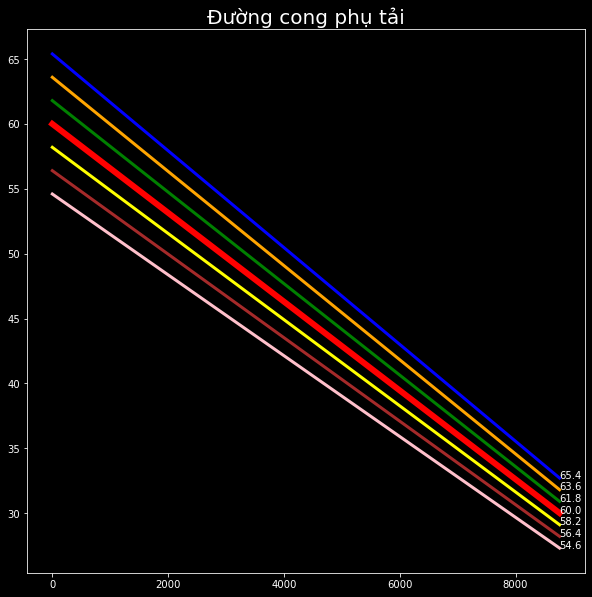

In [44]:
visualize()

### Xấp xỉ phối chuẩn để tính LOLE, LOEE trung bình 

**Xấp xỉ phối chuẩn để tính LOLE, LOEE trung bình**


**Thời gian kỳ vọng thiếu hụt công suất nguồn:**

$$\text{LOLE} = \sum P_{(\theta\sigma)}.\text{LOLE}_{(\theta, \sigma)}$$

**Điện năng kỳ vọng thiếu hụt trong năm:**

$$\text{LOEE} = \sum P_{(\theta\sigma)}.\text{LOEE}_{(\theta, \sigma)}$$

In [47]:
def avgLOLE_LOEE():
    """
    norm_cdf: Cumulative distribution function
    """
    theta = [3, 2, 1, 0, -1, -2, -3]
    norm_coef = [norm.cdf(3)-norm.cdf(2.5), norm.cdf(2.5)-norm.cdf(1.5), 
                 norm.cdf(1.5)-norm.cdf(0.5), norm.cdf(0.5)-norm.cdf(-0.5)] + [norm.cdf(1.5)-norm.cdf(0.5),
                                                                               norm.cdf(2.5)-norm.cdf(1.5),
                                                                              norm.cdf(3)-norm.cdf(2.5)]
    avg_lole = 0
    avg_loee = 0
    for i in range(len(theta)):
        pi, P, T, T_exp, A, A_exp, LOLE, LOEE, P_lmax, P_lmin = calculate(nums_of_machines, 
                                                                      power_per_machine, peak_load, For, std, theta[i], load_char)
        
        avg_lole += norm_coef[i] * LOLE
        avg_loee += norm_coef[i] * LOEE
    return avg_lole, avg_loee

In [48]:
avg_LOLE, avg_LOEE = avgLOLE_LOEE()
print("Thời gian kỳ vọng thiếu hụt công suất nguồn: {} (giờ)".format(avg_LOLE))
print("Điện năng kỳ vọng thiếu hụt trong năm: {}(MW)".format(avg_LOEE))

Thời gian kỳ vọng thiếu hụt công suất nguồn: 33.786316644229174 (giờ)
Điện năng kỳ vọng thiếu hụt trong năm: 94.40187990404475(MW)


In [49]:
# Tạo dataframe lưu giá trị avg_LOLE, avg_LOEE
d = {"Thời gian kỳ vọng thiếu hụt công suất": avg_LOLE, "Điện năng kỳ vọng thiếu hụt trong năm": avg_LOEE}
df_avg = pd.DataFrame(data = d, index = ["value"])
df_avg

,Thời gian kỳ vọng thiếu hụt công suất,Điện năng kỳ vọng thiếu hụt trong năm
value,33.786317,94.40188


### Lưu kết quả vào file excel

Các kết quả lưu:
- Bảng số liệu tính toán tương ứng với mỗi giá trị của theta.

- Bảng LOLE, LOEE.

- Giá trị LOLE kỳ vọng, LOEE kỳ vọng cuối cùng.

In [35]:
!pip install xlwt
!pip install openpyxl

In [36]:
import openpyxl

In [37]:
# Define path 
path = 'D:\XSTK\XSTK_B2.xlsx'
writer = pd.ExcelWriter(path, engine='xlsxwriter')
dfpos3.to_excel(writer, sheet_name='theta=3')
dfpos2.to_excel(writer, sheet_name='theta=2')
dfpos1.to_excel(writer, sheet_name='theta=1')
dfpos0.to_excel(writer, sheet_name='theta=0')
dfneg1.to_excel(writer, sheet_name='theta=-1')
dfneg2.to_excel(writer, sheet_name='theta=-2')
dfneg3.to_excel(writer, sheet_name ='theta=-3')
df.to_excel(writer,sheet_name="Stats LOLE-LOEE")
df_avg.to_excel(writer, sheet_name = "LOLE-LOEE")
writer.save()